<a href="https://colab.research.google.com/github/FreddyCorrea/AppliedDeepLearningClass/blob/master/MLReutersPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRESENTADO POR

Freddy Alexander Correa

Codg 201823450



# **The Reuters dataset**

It is a set of short newswires and their topics, published by Reuters in 1986. There are 46 different topics; some topics are more represented than others, but each topic has at least 10 examples in the training set. 

The Reuters dataset comes packaged as part of Keras. The following code will load the dataset. 

In [0]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels)=reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


The argument ``num_words=10000`` means you'll only keep the top 10000 most frequently occurring words in the training data. Rare words will be discarted. 

The variables ``train_data`` and ``test_data`` are lists of newswires; each new is a list of word indices (encoding a sequence of words). 
You have 8982 training examples and 2246 test examples.





In [0]:
len(train_data)

8982

In [0]:
 len(test_data)

2246

In [0]:
#Each example is a list of integers (word indices):
# train_data[10]

Because you're restricting yourself to the top 10000 most frequent words, no word index will exceed 10000: 

In [0]:
max([max(i) for i in train_data])


9999

Here's how you can decode one of these news back to English words: 

In [0]:
word_index = reuters.get_word_index() #word_index is a dictionary mapping words to an integer index
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()]) #reverses it, mapping integer indices to words
decoded_newswire= ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[10]]) #the indices are offset by 3 because 0, 1, and 2 are reserved indices for "padding," "start of sequence," and "unknowns."
print(decoded_newswire)

557056/550378 [==============================] - 0s 0us/step
? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3


The label associated with an example is an integer between 0 and 45 - a topic index:

In [0]:
train_labels[150]

7

# **Preparing the data**

You have to turn your lists into tensors. There are two ways to do that: 


1. Pad your lists so that they all have the same length, turn them into an integer tensor of shape `(samples, word_indices)`, and then use as the first layer in your network a layer capable of handling such integer tensors.
2.   One-hot encode your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [3, 5] into a 10000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s. Then you could use as the first layer in your network a Dense layer, capable of handling floating-point vector data.

Let’s go with the latter solution to vectorize the data, which you’ll do manually for maximum clarity.



In [0]:
#Encoding the integer sequences into a binary matrix 
import numpy as np

def vectorize_sequences(sequences, dimension=10000):   #Creates an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.                          #Sets specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data)   #Vectorized training data
x_test = vectorize_sequences(test_data)     #Vectorized test data

Here’s what the samples look like now:


In [0]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

To vectorize the labels, there are two possibilities: you can cast the label list as an integer tensor, or you can use one-hot encoding. One-hot encoding is a widely used format for categorical data, also called categorical encoding. In this case, one-hot encoding of the labels consists of embedding each label as an all-zero vector with a 1 in the place of the label index. Here’s an example:

In [0]:
def to_one_hot(labels, dimension=10000):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels) #Vectorized training labels
one_hot_test_labels = to_one_hot(test_labels)   #Vectorized test labels

There is a *built-in way* to do this in Keras:

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# **Building your network**





# **MLP With Different Loss Functions**

# **Sigmoid Activation and MSE Loss**

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
act = []
model.add(layers.Dense(46, activation='sigmoid', input_shape=(10000,)))
#
model.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

# **Validating your approach**

Let’s set apart 1000 samples in the training data to use as a validation set.

In [0]:
# Setting aside a validation set

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

The call to `model.fit()` returns a `History` object. This object has a member
history, which is a dictionary containing data about everything that happened
during training. Let’s look at it:



In [0]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))




Train on 7982 samples, validate on 1000 samples
Epoch 1/20





7982/7982 [==============================] - 2s 213us/step - loss: 0.2525 - acc: 0.0541 - val_loss: 0.2510 - val_acc: 0.0470
Epoch 2/20
7982/7982 [==============================] - 1s 138us/step - loss: 0.2495 - acc: 0.0610 - val_loss: 0.2481 - val_acc: 0.0540
Epoch 3/20
7982/7982 [==============================] - 1s 139us/step - loss: 0.2466 - acc: 0.0685 - val_loss: 0.2452 - val_acc: 0.0690
Epoch 4/20
7982/7982 [==============================] - 1s 138us/step - loss: 0.2437 - acc: 0.0762 - val_loss: 0.2423 - val_acc: 0.0800
Epoch 5/20
7982/7982 [==============================] - 1s 139us/step - loss: 0.2408 - acc: 0.0871 - val_loss: 0.2395 - val_acc: 0.0910
Epoch 6/20
7982/7982 [==============================] - 1s 142us/step - loss: 0.2381 - acc: 0.0978 - val_loss: 0.2367 - val_acc: 0.0970
Epoch 7/20
7982/7982 [==============================] - 1s 142us/step - loss: 0.2353 - acc: 0.1072 - val_loss: 0.2340 - val_acc:

The dictionary contains four entries: one per metric that was being monitored during training and during validation. In the following two listing, let’s use Matplotlib to plot the training and validation loss side by side, as well as the training and validation accuracy. Note that your own results may vary slightly due to a different random initialization of your network.

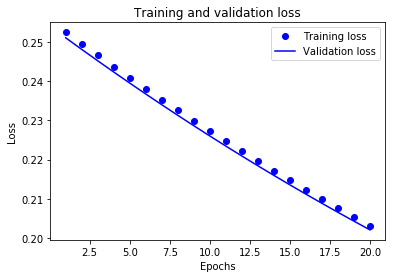

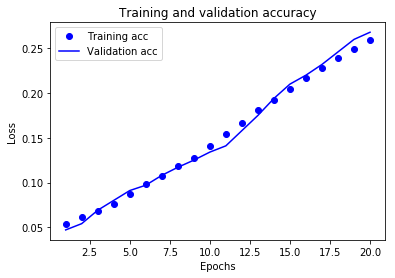

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')  #“bo” is for “blue dot.”
plt.plot(epochs, val_loss, 'b', label='Validation loss')  #“b” is for “solid blue line.”
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generating predictions on new data

You can verify that the predict method of the model instance returns a probability distribution over all 46 topics. Let’s generate topic predictions for all of the test data.

In [0]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [0]:
np.sum(predictions[0])

19.74806

In [0]:
np.argmax(predictions[0])

3

# **Sigmoid Activation with Categorical Cross Entropy Loss**

In [0]:
from keras import models
from keras import layers


model = models.Sequential()
model.add(layers.Dense(46, activation='sigmoid', input_shape=(10000,)))

model.compile( optimizer='sgd', loss ='categorical_crossentropy' , metrics=['accuracy'])

history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val, y_val))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 148us/step - loss: 3.7990 - acc: 0.0996 - val_loss: 3.7542 - val_acc: 0.3210
Epoch 2/20
7982/7982 [==============================] - 1s 124us/step - loss: 3.7239 - acc: 0.4084 - val_loss: 3.6898 - val_acc: 0.4760
Epoch 3/20
7982/7982 [==============================] - 1s 126us/step - loss: 3.6672 - acc: 0.4691 - val_loss: 3.6405 - val_acc: 0.4890
Epoch 4/20
7982/7982 [==============================] - 1s 128us/step - loss: 3.6230 - acc: 0.4806 - val_loss: 3.6015 - val_acc: 0.4990
Epoch 5/20
7982/7982 [==============================] - 1s 127us/step - loss: 3.5874 - acc: 0.4873 - val_loss: 3.5695 - val_acc: 0.5030
Epoch 6/20
7982/7982 [==============================] - 1s 127us/step - loss: 3.5578 - acc: 0.4924 - val_loss: 3.5426 - val_acc: 0.5080
Epoch 7/20
7982/7982 [===================

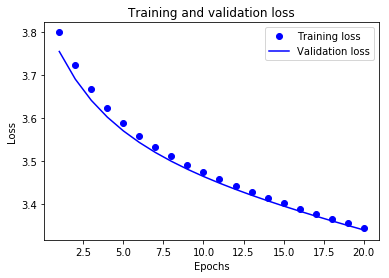

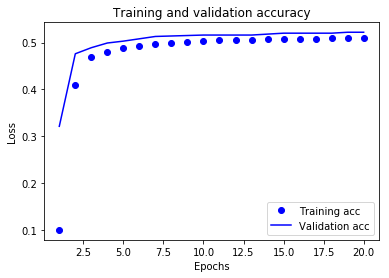

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')  #“bo” is for “blue dot.”
plt.plot(epochs, val_loss, 'b', label='Validation loss')  #“b” is for “solid blue line.”
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Softmax Activation with Categorical Cross Entropy Loss**


In [0]:
from keras import models
from keras import layers


model = models.Sequential()
model.add(layers.Dense(46, activation='softmax', input_shape=(10000,)))

model.compile( optimizer='sgd', loss ='categorical_crossentropy' , metrics=['accuracy'])

history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 148us/step - loss: 3.7071 - acc: 0.2422 - val_loss: 3.5138 - val_acc: 0.4430
Epoch 2/20
7982/7982 [==============================] - 1s 130us/step - loss: 3.3615 - acc: 0.4676 - val_loss: 3.1924 - val_acc: 0.4900
Epoch 3/20
7982/7982 [==============================] - 1s 131us/step - loss: 3.0697 - acc: 0.4911 - val_loss: 2.9310 - val_acc: 0.5030
Epoch 4/20
7982/7982 [==============================] - 1s 132us/step - loss: 2.8381 - acc: 0.5030 - val_loss: 2.7311 - val_acc: 0.5080
Epoch 5/20
7982/7982 [==============================] - 1s 130us/step - loss: 2.6624 - acc: 0.5098 - val_loss: 2.5807 - val_acc: 0.5110
Epoch 6/20
7982/7982 [==============================] - 1s 133us/step - loss: 2.5289 - acc: 0.5147 - val_loss: 2.4654 - val_acc: 0.5160
Epoch 7/20
7982/7982 [==============================] - 1s 131us/step - loss: 2.4248 - acc: 0.5174 - val_loss: 2.3747 - val_acc: 0.5230


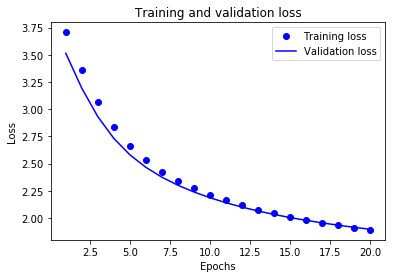

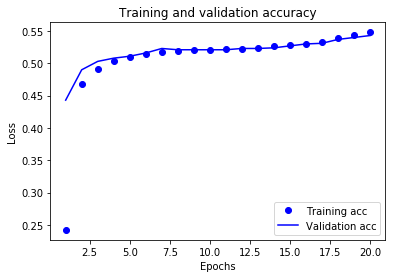

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')  #“bo” is for “blue dot.”
plt.plot(epochs, val_loss, 'b', label='Validation loss')  #“b” is for “solid blue line.”
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Multilayer Softmax Activation with Binary Cross Entropy Loss**

In [0]:
from keras import models
from keras import layers


model = models.Sequential()
model.add(layers.Dense(46, activation='softmax', input_shape=(10000,)))
model.add(layers.Dense(46, activation='relu', input_shape=(10000,)))
model.compile( optimizer='sgd', loss ='binary_crossentropy' , metrics=['accuracy'])

history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 161us/step - loss: 0.2579 - acc: 0.9783 - val_loss: 0.2541 - val_acc: 0.9783
Epoch 2/20
7982/7982 [==============================] - 1s 130us/step - loss: 0.2533 - acc: 0.9783 - val_loss: 0.2521 - val_acc: 0.9783
Epoch 3/20
7982/7982 [==============================] - 1s 132us/step - loss: 0.2507 - acc: 0.9783 - val_loss: 0.2489 - val_acc: 0.9783
Epoch 4/20
7982/7982 [==============================] - 1s 132us/step - loss: 0.2487 - acc: 0.9783 - val_loss: 0.2480 - val_acc: 0.9783
Epoch 5/20
7982/7982 [==============================] - 1s 131us/step - loss: 0.2499 - acc: 0.9783 - val_loss: 0.2500 - val_acc: 0.9783
Epoch 6/20
7982/7982 [==============================] - 1s 131us/step - loss: 0.2501 - acc: 0.9783 - val_loss: 0.2497 - val_acc: 0.9783
Epoch 7/20
7982/7982 [==============================] - 1s 129us/step - loss: 0.2495 - acc: 0.9783 - val_loss: 0.2490 - val_acc: 0.9783


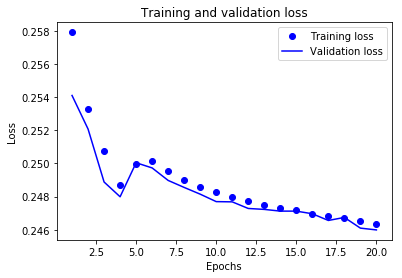

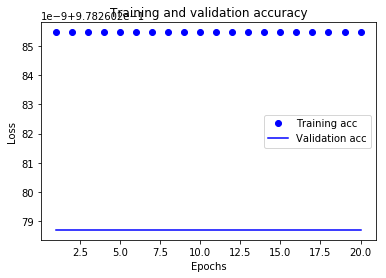

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')  #“bo” is for “blue dot.”
plt.plot(epochs, val_loss, 'b', label='Validation loss')  #“b” is for “solid blue line.”
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Softmax Activation with Binary Cross Entropy Loss**

In [0]:
from keras import models
from keras import layers


model = models.Sequential()
model.add(layers.Dense(46, activation='softmax', input_shape=(10000,)))
model.compile( optimizer='sgd', loss ='binary_crossentropy' , metrics=['accuracy'])

history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 171us/step - loss: 0.1049 - acc: 0.9783 - val_loss: 0.1048 - val_acc: 0.9783
Epoch 2/20
7982/7982 [==============================] - 1s 137us/step - loss: 0.1048 - acc: 0.9783 - val_loss: 0.1046 - val_acc: 0.9783
Epoch 3/20
7982/7982 [==============================] - 1s 141us/step - loss: 0.1046 - acc: 0.9783 - val_loss: 0.1044 - val_acc: 0.9783
Epoch 4/20
7982/7982 [==============================] - 1s 138us/step - loss: 0.1044 - acc: 0.9783 - val_loss: 0.1042 - val_acc: 0.9783
Epoch 5/20
7982/7982 [==============================] - 1s 137us/step - loss: 0.1042 - acc: 0.9783 - val_loss: 0.1041 - val_acc: 0.9783
Epoch 6/20
7982/7982 [==============================] - 1s 136us/step - loss: 0.1040 - acc: 0.9783 - val_loss: 0.1039 - val_acc: 0.9783
Epoch 7/20
7982/7982 [==============================] - 1s 143us/step - loss: 0.1038 - acc: 0.9783 - val_loss: 0.1037 - val_acc: 0.9783


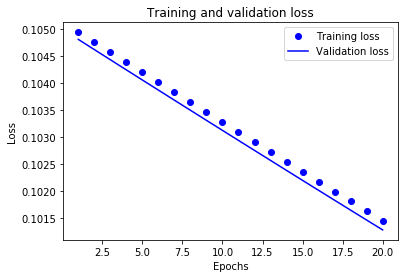

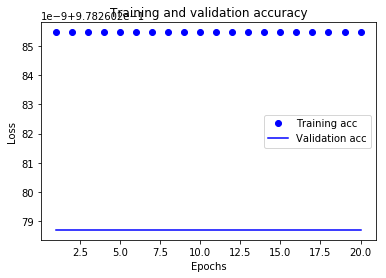

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')  #“bo” is for “blue dot.”
plt.plot(epochs, val_loss, 'b', label='Validation loss')  #“b” is for “solid blue line.”
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##CONCLUSIONES

Con Softmax se obtiene el mejor performance utilizando costo Binary Crossentropy y Optimizer SGD de una capa, así obtenemos el más alto accuracy y el menor costovalor de pérdida.